<a href="https://colab.research.google.com/github/smaranjitghose/PyCorona/blob/master/PyCorona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing some basic dependencies

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import plotly.graph_objects as go
import plotly as py
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
import warnings
warnings.filterwarnings('ignore')

# Loading our Dataset

Credits:
https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 2019_nCoV_data.csv to 2019_nCoV_data.csv


In [55]:

#The parse_dates parameter make sure that the Last Update column is parsed as a date not a string.
data = pd.read_csv("/content/2019_nCoV_data.csv",parse_dates=['Last Update'])
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
Sno               1719 non-null int64
Date              1719 non-null object
Province/State    1257 non-null object
Country           1719 non-null object
Last Update       1719 non-null datetime64[ns]
Confirmed         1719 non-null float64
Deaths            1719 non-null float64
Recovered         1719 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 107.6+ KB


In [57]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,1719.0,860.000000,496.376873,1.0,430.5,860.0,1289.5,1719.0
Confirmed,1719.0,454.596859,3712.529032,0.0,2.0,12.0,109.0,59989.0
Deaths,1719.0,10.441536,106.638286,0.0,0.0,0.0,0.0,1789.0
Recovered,1719.0,44.361838,351.078713,0.0,0.0,0.0,7.0,7862.0


## Now, lets find out the countries that fell prey to the Corona Virus

In [76]:
print("Number of countries affected till now:{}".format(len(data['Country'].unique())))

Number of countries affected till now:34


In [75]:
print(data['Country'].unique())

['China' 'US' 'Japan' 'Thailand' 'South Korea' 'Mainland China'
 'Hong Kong' 'Macau' 'Taiwan' 'Singapore' 'Philippines' 'Malaysia'
 'Vietnam' 'Australia' 'Mexico' 'Brazil' 'France' 'Nepal' 'Canada'
 'Cambodia' 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland'
 'United Arab Emirates' 'India' 'Italy' 'Sweden' 'Russia' 'Spain' 'UK'
 'Belgium' 'Others' 'Egypt']


In [0]:
data['Last Update']=data['Last Update'].apply(pd.to_datetime)
data.drop(['Sno'],axis=1,inplace=True)

In [74]:
data.head(5)

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,01/22/2020 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,01/22/2020 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,01/22/2020 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,01/22/2020 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [77]:
data.groupby(['Country'])['Confirmed'].sum().sort_values(ascending = False)[:16]

Country
Mainland China    772951.0
Others              2161.0
Singapore            797.0
Hong Kong            681.0
Japan                591.0
Thailand             581.0
China                549.0
South Korea          444.0
Taiwan               320.0
Malaysia             303.0
Australia            284.0
Germany              252.0
US                   250.0
Vietnam              225.0
Macau                209.0
France               186.0
Name: Confirmed, dtype: float64

In [24]:
df.groupby(['Country'])['Recovered'].sum().sort_values(ascending = False)[:5]

Country
Mainland China    75440.0
Thailand            176.0
Singapore           122.0
Japan                91.0
Australia            70.0
Name: Recovered, dtype: float64

In [26]:
df.groupby(['Country'])['Deaths'].sum().sort_values(ascending = False)[:5]

Country
Mainland China    17908.0
Philippines          17.0
Hong Kong            14.0
Japan                 5.0
France                3.0
Name: Deaths, dtype: float64

In [0]:
data_30 = df[df['Last Update'] > pd.Timestamp(date(2020,2,20))]

In [28]:
data_30.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
375,01/30/2020 21:30:00,Hubei,Mainland China,2020-01-30 21:30:00,5806.0,204.0,116.0
376,01/30/2020 21:30:00,Zhejiang,Mainland China,2020-01-30 21:30:00,537.0,0.0,9.0
377,01/30/2020 21:30:00,Guangdong,Mainland China,2020-01-30 21:30:00,393.0,0.0,11.0
378,01/30/2020 21:30:00,Henan,Mainland China,2020-01-30 21:30:00,352.0,2.0,3.0
379,01/30/2020 21:30:00,Hunan,Mainland China,2020-01-30 21:30:00,332.0,0.0,2.0


In [80]:
print('Globally Confirmed Cases: ',data_30['Confirmed'].sum())
print('Global Deaths: ',data_30['Deaths'].sum())
print('Globally Recovered Cases: ',data_30['Recovered'].sum())

Globally Confirmed Cases:  173939.0
Global Deaths:  3499.0
Globally Recovered Cases:  8664.0


# **The outbreak has severely effected the regions of China and Mainland China Provinces**

In [78]:
China=data[data.Country=='Mainland China']
print(China.groupby(['Province/State'])['Confirmed'].sum().sort_values(ascending=False)[:10])

Province/State
Hubei        589477.0
Guangdong     20058.0
Zhejiang      19582.0
Henan         18148.0
Hunan         15343.0
Anhui         13621.0
Jiangxi       13055.0
Chongqing      8702.0
Jiangsu        8602.0
Shandong       7932.0
Name: Confirmed, dtype: float64


In [38]:
state_wise = China.groupby('Province/State')['Confirmed','Deaths','Recovered'].sum().reset_index()
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=state_wise['Province/State'], y=state_wise['Confirmed']),
    go.Bar(name='Deaths', x=state_wise['Province/State'], y=state_wise['Deaths']),
    go.Bar(name='Recovered', x=state_wise['Province/State'], y=state_wise['Recovered']),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

**The most effected state of China is Hubei whose capital is Wuhan city-the epicentre of Corona Virus**

## Outside China

In [0]:
country_data=data.groupby(['Country','Date'],as_index=False).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
countries=data.Country.unique()
ocountries=[i for i in countries if (i!='China') & (i!='Mainland China')]

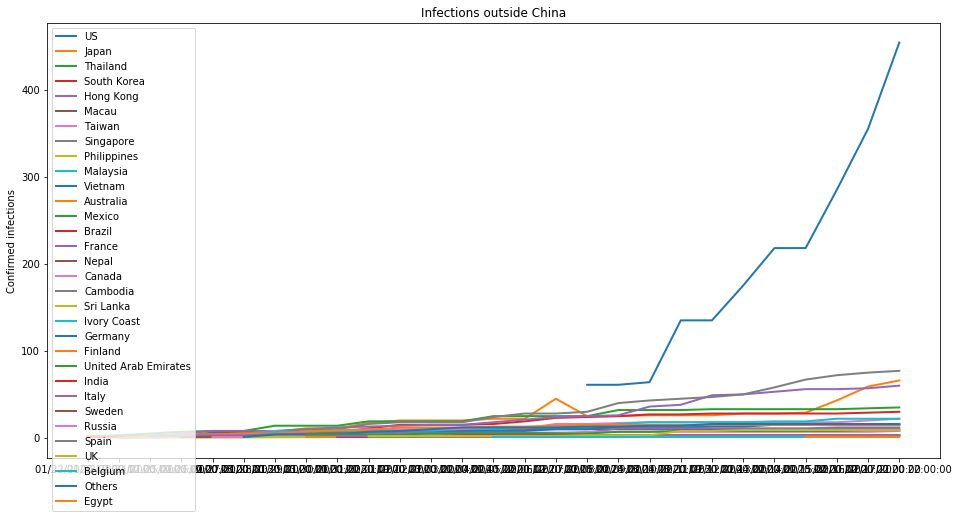

In [62]:
plt.figure(figsize=(16,8))
for country in ocountries:
    y=country_data.loc[country_data['Country']==country,'Confirmed']
    x=country_data.loc[country_data['Country']==country,'Date']
    plt.plot(x,y,lw=2)
    
plt.legend(ocountries)
plt.ylabel('Confirmed infections')
plt.title('Infections outside China')
plt.show()

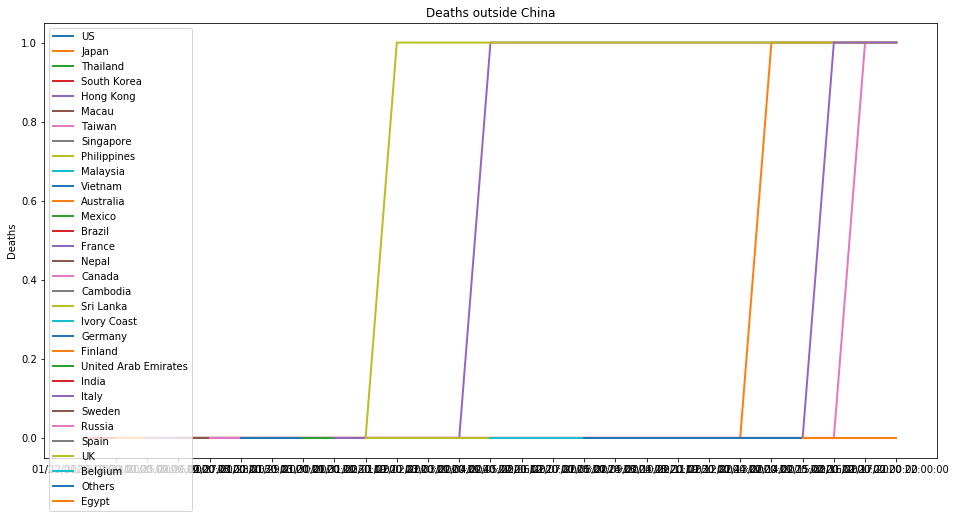

In [63]:
plt.figure(figsize=(16,8))
for country in ocountries:
    y=country_data.loc[country_data['Country']==country,'Deaths']
    x=country_data.loc[country_data['Country']==country,'Date']
    plt.plot(x,y,lw=2)
    
plt.legend(ocountries)
plt.ylabel('Deaths')
plt.title('Deaths outside China')
plt.show()

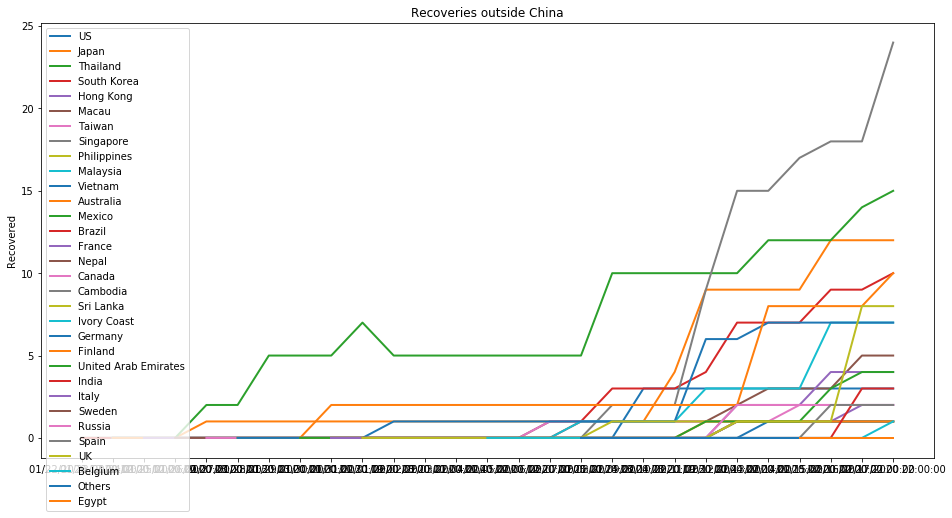

In [64]:

plt.figure(figsize=(16,8))
for country in ocountries:
    y=country_data.loc[country_data['Country']==country,'Recovered']
    x=country_data.loc[country_data['Country']==country,'Date']
    plt.plot(x,y,lw=2)
    
plt.legend(ocountries)
plt.ylabel('Recovered')
plt.title('Recoveries outside China')
plt.show()

# In and around India


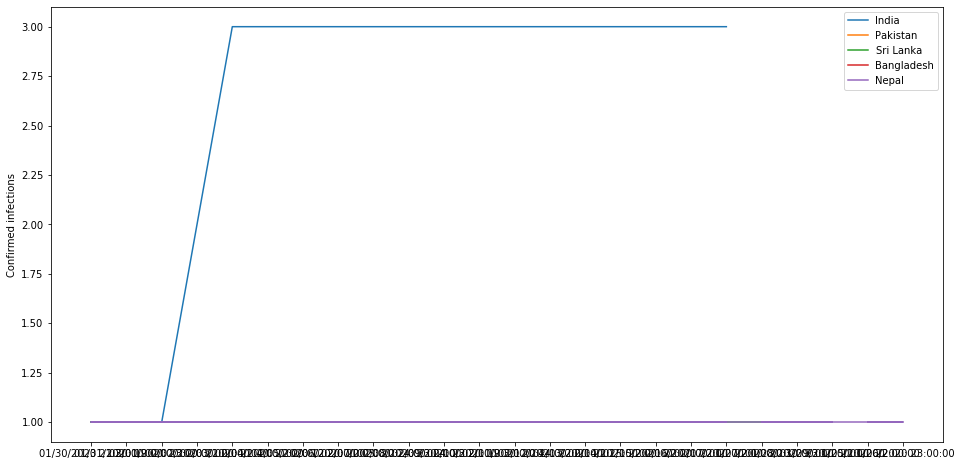

In [68]:
these_countries=['India','Pakistan','Sri Lanka','Bangladesh','Nepal']
plt.figure(figsize=(16,8))
for country in these_countries:
    y=country_data.loc[country_data['Country']==country,'Confirmed']
    x=country_data.loc[country_data['Country']==country,'Date']
    plt.plot(x,y)
    
plt.legend(these_countries)
plt.ylabel('Confirmed infections')
plt.show()

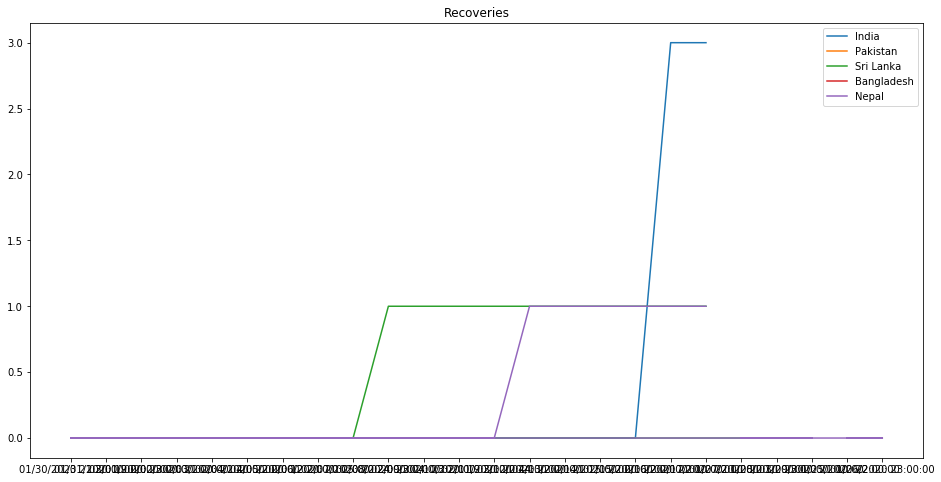

In [67]:
plt.figure(figsize=(16,8))
for country in these_countries:
    y=country_data.loc[country_data['Country']==country,'Recovered']
    x=country_data.loc[country_data['Country']==country,'Date']
    plt.plot(x,y)
    
plt.legend(these_countries)
plt.title('Recoveries')
plt.show()

In [69]:
print(df[df['Country']=='India'])

                     Date Province/State Country  ... Confirmed  Deaths  Recovered
432   01/30/2020 21:30:00            NaN   India  ...       1.0     0.0        0.0
491   01/31/2020 19:00:00            NaN   India  ...       1.0     0.0        0.0
552   02/01/2020 23:00:00            NaN   India  ...       1.0     0.0        0.0
611   02/02/2020 21:00:00            NaN   India  ...       2.0     0.0        0.0
675   02/03/2020 21:40:00            NaN   India  ...       3.0     0.0        0.0
745   02/04/2020 22:00:00            NaN   India  ...       3.0     0.0        0.0
815   02/05/2020 12:20:00            NaN   India  ...       3.0     0.0        0.0
885   02/06/2020 20:05:00            NaN   India  ...       3.0     0.0        0.0
958   02/07/2020 20:24:00            NaN   India  ...       3.0     0.0        0.0
1030  02/08/2020 23:04:00            NaN   India  ...       3.0     0.0        0.0
1102  02/09/2020 23:20:00            NaN   India  ...       3.0     0.0        0.0
1175

In [71]:
print("Number of cases reported till now in India: {}".format(len(df[df['Country']=='India'])))

Number of cases reported till now in India: 19
